In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'vishalkehri1'
os.environ['KAGGLE_KEY'] = '1464f4180f2e85a0c2d3bcae09b676d2'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

100% 207M/207M [00:01<00:00, 230MB/s]
100% 207M/207M [00:01<00:00, 213MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1053.jpg', '1166.jpg', '1095.jpg', '0930.jpg', '1115.jpg', '0777.jpg', '0786.jpg', '1214.jpg', '0731.jpg', '0309.jpg']
['109.jpg', '73.jpg', '115.jpg', '290.jpg', '232.jpg', '116.jpg', '193.jpg', '14.jpg', '54.jpg', '221.jpg']


['/content/New Masks Dataset/Train/Mask/1053.jpg', '/content/New Masks Dataset/Train/Mask/1166.jpg', '/content/New Masks Dataset/Train/Mask/1095.jpg', '/content/New Masks Dataset/Train/Mask/0930.jpg', '/content/New Masks Dataset/Train/Mask/1115.jpg', '/content/New Masks Dataset/Train/Mask/0777.jpg', '/content/New Masks Dataset/Train/Mask/0786.jpg', '/content/New Masks Dataset/Train/Mask/1214.jpg']
['/content/New Masks Dataset/Train/Non Mask/109.jpg', '/content/New Masks Dataset/Train/Non Mask/73.jpg', '/content/New Masks Dataset/Train/Non Mask/115.jpg', '/content/New Masks Dataset/Train/Non Mask/290.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/116.jpg', '/content/New Masks Dataset/Train/Non Mask/193.jpg', '/content/New Masks Dataset/Train/Non Mask/14.jpg']


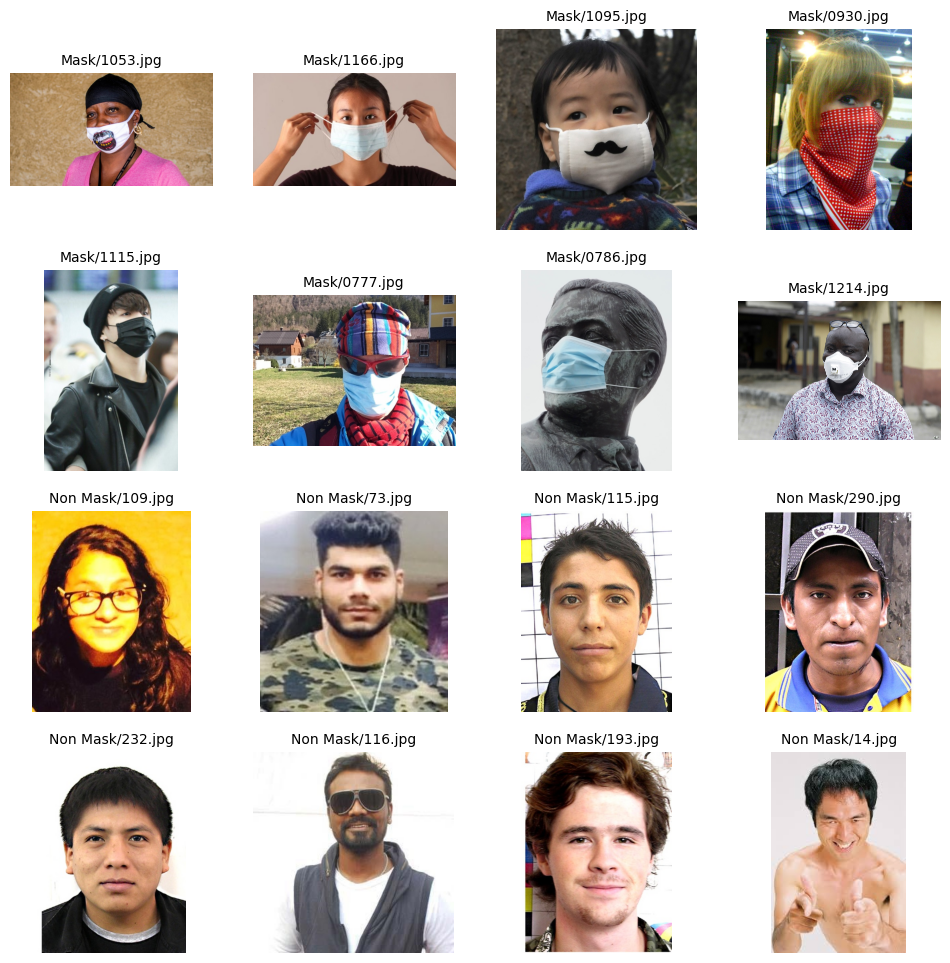

In [7]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 25s 490ms/step - loss: 3.1544 - accuracy: 0.5300 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 10s 531ms/step - loss: 0.6894 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 10s 529ms/step - loss: 0.6904 - accuracy: 0.5700 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 10s 515ms/step - loss: 0.6840 - accuracy: 0.5167 - val_loss: 0.6922 - val_accuracy: 0.5294
Epoch 5/30
19/19 [==============================] - 9s 476ms/step - loss: 0.6554 - accuracy: 0.5983 - val_loss: 0.6785 - val_accuracy: 0.6176
Epoch 6/30
19/19 [==============================] - 11s 570ms/step - loss: 0.4886 - accuracy: 0.7583 - val_loss: 0.4799 - val_accuracy: 0.8791
Epoch 7/30
19/19 [==============================] - 10s 533ms/step - loss: 0.3287 - accuracy: 0.8850 - val_loss: 0.4328 - val_accuracy: 0.8529


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

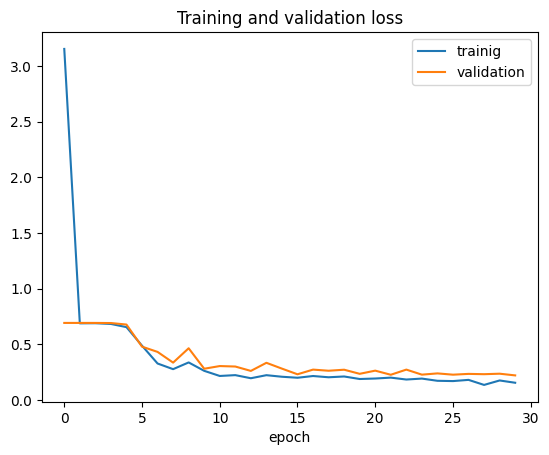

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

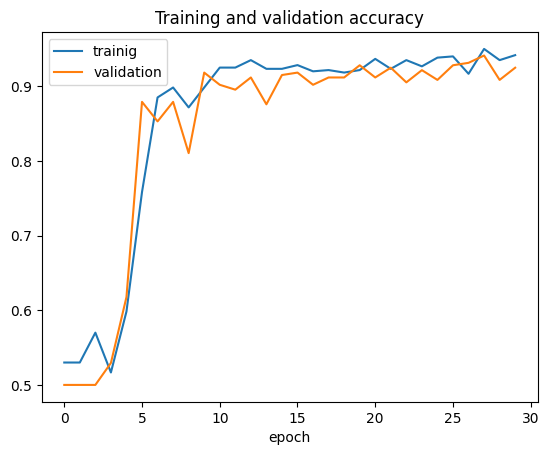

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [17]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 265ms/step - loss: 0.1600 - accuracy: 0.9600
test acc :0.9599999785423279 test loss:0.16003777086734772


In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving mask.jpg.jpg to mask.jpg (1).jpg
Saving nomask.jpg to nomask.jpg
1/1 [==============================] - 0s 19ms/step
mask.jpg (1).jpg
nomask
1/1 [==============================] - 0s 19ms/step
nomask.jpg
nomask


In [20]:
model.save('h5')